In [46]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import manifold, datasets
from scipy.stats import gaussian_kde
import random

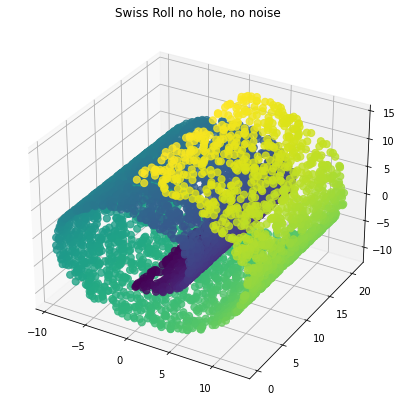

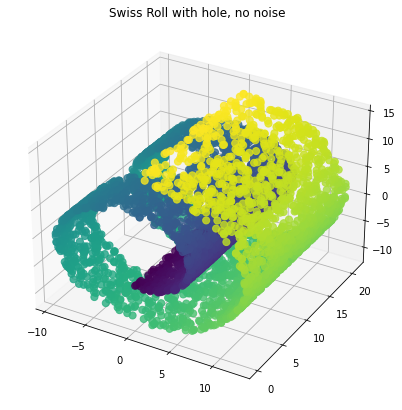

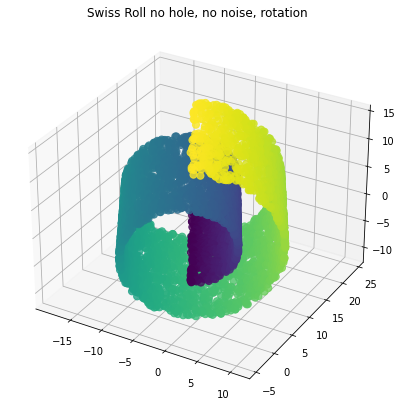

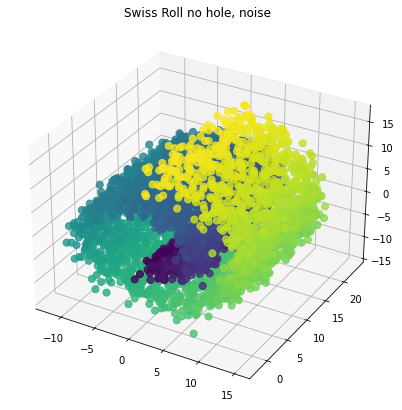

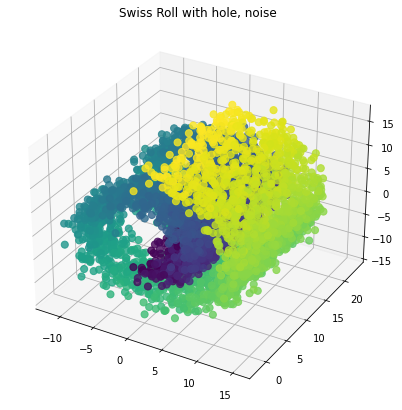

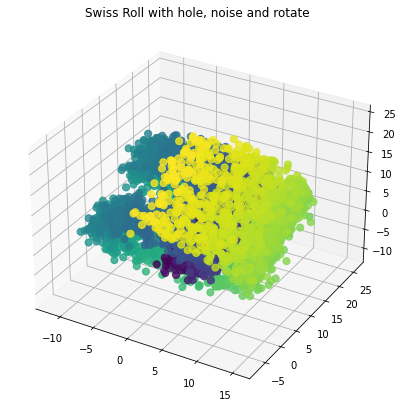

In [47]:
###1.Swiss roll and Swiss roll with hole
#no hole
n=5000
data_nohole, color_nohole = datasets.make_swiss_roll(n_samples=n,noise=0,random_state=1,hole=False)
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
ax.scatter(data_nohole[:, 0], data_nohole[:, 1], data_nohole[:, 2], c=color_nohole, s=50, alpha=0.8)
ax.set_title("Swiss Roll no hole, no noise")
plt.show()
#with hole
data_hole, color_hole = datasets.make_swiss_roll(n_samples=n,noise=0,random_state=1,hole=True)
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
ax.set_title("Swiss Roll with hole, no noise")
ax.scatter(data_hole[:, 0], data_hole[:, 1], data_hole[:, 2], c=color_hole, s=50, alpha=0.8)
plt.show()

#stage1 total dimension 20 with 17 zeros
#data of one column to be one points
data_nohole = np.append(data_nohole,[[0]*17]*n,1)
data_nohole = np.transpose(data_nohole)##

data_hole = np.append(data_hole,[[0]*17]*n,1)
data_hole = np.transpose(data_hole)##

#stage2 rotation
#30degree
theta = np.radians(30)
rotation = np.identity(20)
rotation[2,2]=np.cos(theta)
rotation[1,2]=-np.sin(theta)
rotation[2,1]=np.sin(theta)
rotation[1,1]=np.cos(theta)

rotation1 = np.identity(20)
rotation1[0,0]=np.cos(theta)
rotation1[0,1]=-np.sin(theta)
rotation1[1,0]=np.sin(theta)
rotation1[1,1]=np.cos(theta)


rot_nohole=rotation1.dot(data_nohole)##

fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
ax.set_title("Swiss Roll no hole, no noise, rotation")
ax.scatter(rot_nohole[0, :], rot_nohole[1, :], rot_nohole[2, :], c=color_nohole, s=50, alpha=0.8)
plt.show()

rot_hole=rotation.dot(data_hole)##

#stage3
data_noise_nohole, color_noise_nohole = datasets.make_swiss_roll(n_samples=n,noise=1,random_state=1,hole=False)
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
ax.scatter(data_noise_nohole[:, 0], 
           data_noise_nohole[:, 1], 
           data_noise_nohole[:, 2], 
           c=color_noise_nohole, s=50, alpha=0.8)
ax.set_title("Swiss Roll no hole, noise")
plt.show()

data_noise_hole, color_noise_hole = datasets.make_swiss_roll(n_samples=n,noise=1,random_state=1,hole=True)
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
ax.scatter(data_noise_hole[:, 0], 
           data_noise_hole[:, 1], 
           data_noise_hole[:, 2], 
           c=color_noise_hole, s=50, alpha=0.8)
ax.set_title("Swiss Roll with hole, noise")
plt.show()

data_noise_nohole = np.append(data_noise_nohole,[[0]*17]*n,1)
data_noise_nohole = np.transpose(data_noise_nohole)##

data_noise_hole = np.append(data_noise_hole,[[0]*17]*n,1)
data_noise_hole = np.transpose(data_noise_hole)##

rot_noise_hole = rotation.dot(data_noise_hole)##
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
ax.scatter(rot_noise_hole[0, :], 
           rot_noise_hole[1, :], 
           rot_noise_hole[2, :], 
           c=color_noise_hole, s=50, alpha=0.8)
ax.set_title("Swiss Roll with hole, noise and rotate")
plt.show()

##Seven datasets(20*n matrix) used for manifold learning:
#1.data_nohole 
#2.data_hole 
#3.rot_nohole
#4.rot_hole
#5.data_noise_nohole
#6.data_noise_hole
#7.rot_noise_hole
#**every column to be each observation, e.g:data_nohole[:,0] 
#plot use: axes to be e.g:data_nohole[0,:] 
np.savetxt('swiss_nohole.csv', data_nohole, delimiter=',')
np.savetxt('swiss_hole.csv', data_hole, delimiter=',')
np.savetxt('swiss_rot_nohole.csv', rot_nohole, delimiter=',')
np.savetxt('swiss_rot_hole.csv', rot_hole, delimiter=',')
np.savetxt('swiss_noise_nohole.csv', data_noise_nohole, delimiter=',')
np.savetxt('swiss_noise_hole.csv', data_noise_hole, delimiter=',')
np.savetxt('swiss_rot_noise_hole.csv', rot_noise_hole, delimiter=',')


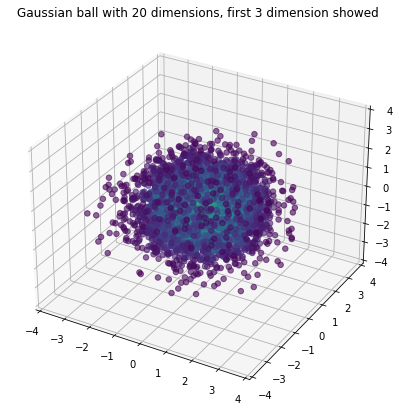

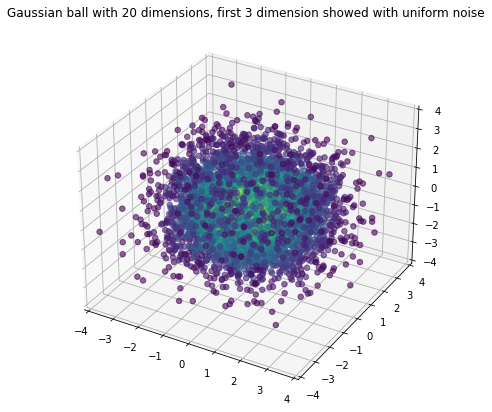

In [48]:
###2.Gaussian Ball with 20 dimensions
#stage1:
n=5000
dim=20
mean = [0]*dim
cov = np.identity(dim)*1
a= np.random.multivariate_normal(mean, cov, n).T
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")

xyz = np.vstack([a[0,:],a[1,:],a[2,:]])
density = stats.gaussian_kde(xyz)(xyz) 
idx = density.argsort()
x, y, z, density = a[0,:][idx], a[1,:][idx], a[2,:][idx], density[idx]
ax.scatter(x,y,z,c=density, s=30, alpha=0.6)
ax.set_title("Gaussian ball with 20 dimensions, first 3 dimension showed")
ax.axes.set_xlim3d(left=-4, right=4) 
ax.axes.set_ylim3d(bottom=-4, top=4) 
ax.axes.set_zlim3d(bottom=-4, top=4)
plt.show()

#stage3 add uniform noise:
a_noise=a+np.random.uniform(-1.5,1.5,n*dim).reshape((dim,n))
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
xyz = np.vstack([a_noise[0,:],a_noise[1,:],a_noise[2,:]])
density = stats.gaussian_kde(xyz)(xyz) 
idx = density.argsort()
x, y, z, density = a_noise[0,:][idx], a_noise[1,:][idx], a_noise[2,:][idx], density[idx]
ax.scatter(x,y,z,c=density, s=30, alpha=0.6)
ax.set_title("Gaussian ball with 20 dimensions, first 3 dimension showed with uniform noise")
ax.axes.set_xlim3d(left=-4, right=4) 
ax.axes.set_ylim3d(bottom=-4, top=4) 
ax.axes.set_zlim3d(bottom=-4, top=4)
plt.show()

##Two datasets(20*n matrix) used for manifold learning:
#1.a
#2.a_noise 
#**every column to be each observation, e.g:a[:,0] 
#plot use: axes to be e.g:a[0,:] 
np.savetxt('gaussian_ball.csv', a, delimiter=',')
np.savetxt('gaussian_ball_noise.csv', a_noise, delimiter=',')

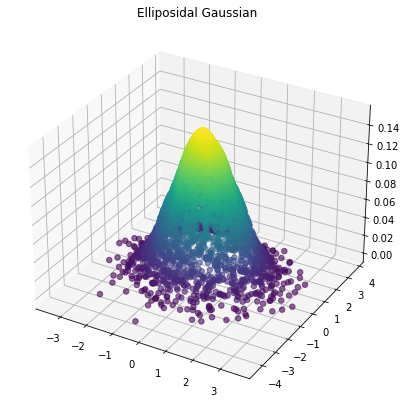

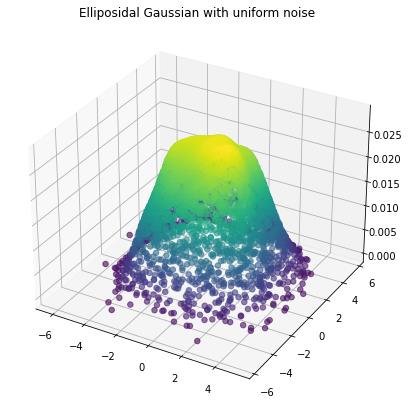

In [49]:
###3.elliposidal gaussian
n=5000
dim=2
mean = [0]*dim
cov = np.identity(dim)*1
ellip_gau= np.random.multivariate_normal(mean, cov, n).T

fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
xy = np.vstack([ellip_gau[0,:],ellip_gau[1,:]])
density = stats.gaussian_kde(xy)(xy) 
idx = density.argsort()
x, y, density = ellip_gau[0,:][idx], ellip_gau[1,:][idx], density[idx]
ax.scatter(x,y,density,c=density, s=30, alpha=0.6)
ax.set_title("Elliposidal Gaussian")
plt.show()

#stage1:
ellip_gau = np.append(ellip_gau,[[0]*n]*18,0)###

#stage3 add noise:
sigma=3
noise = np.random.uniform(-sigma,sigma,n*2).reshape((2,n))
noise = np.append(noise,[[0]*n]*18,0)
ellip_gau_noise=ellip_gau+noise

fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
xy = np.vstack([ellip_gau_noise[0,:],ellip_gau_noise[1,:]])
density = stats.gaussian_kde(xy)(xy) 
idx = density.argsort()
x, y, density = ellip_gau_noise[0,:][idx], ellip_gau_noise[1,:][idx], density[idx]
ax.scatter(x,y,density,c=density, s=30, alpha=0.6)
ax.set_title("Elliposidal Gaussian with uniform noise")
plt.show()

##Two datasets(20*n matrix) used for manifold learning:
#1.ellip_gau
#2.ellip_gau_noise
np.savetxt('ellip_gau.csv', ellip_gau, delimiter=',')
np.savetxt('ellip_gau_noise.csv', ellip_gau_noise, delimiter=',')

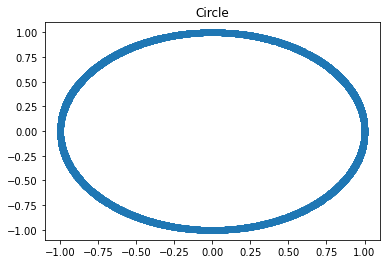

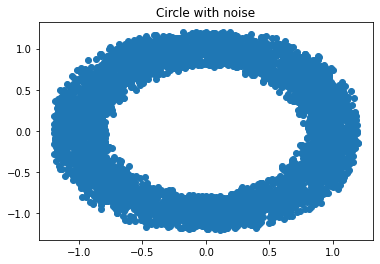

In [50]:
###4.Circle
#stage1:
n=5000
def circle(n):
    x = []
    y = []
    for i in range(0,n):
        angle = random.uniform(0,1)*(math.pi*2)
        x.append(math.cos(angle));
        y.append(math.sin(angle));
    return x,y
x,y=circle(n)
circle =[x,y]
circle =np.reshape(circle,(2,n))
circle = np.append(circle,[[0]*n]*18,0)
plt.scatter(circle[0,:],circle[1,:])
plt.title("Circle")
plt.show()
#stage3:
sigma = 0.2
noise = np.random.uniform(-sigma,sigma,n*2).reshape((2,n))
noise = np.append(noise,[[0]*n]*18,0)
circle_noise=circle+noise
plt.scatter(circle_noise[0,:],circle_noise[1,:])
plt.title("Circle with noise")
plt.show()
##Two datasets(20*n matrix) used for manifold learning:
#1.circle
#2.circle_noise 
#**every column to be each observation, e.g:circle[:,0] 
#plot use: axes to be e.g:circle[0,:] 
np.savetxt('circle.csv', circle, delimiter=',')
np.savetxt('circle_noise.csv', circle_noise, delimiter=',')

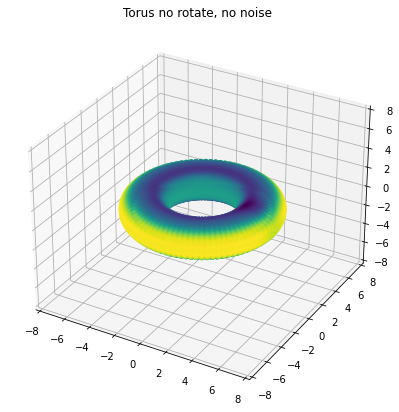

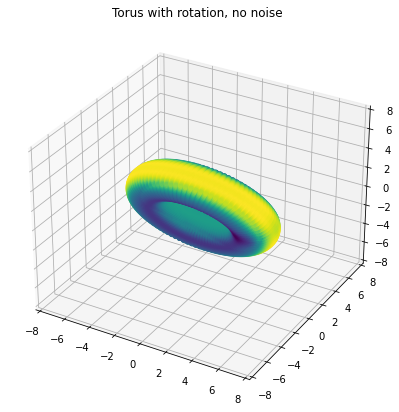

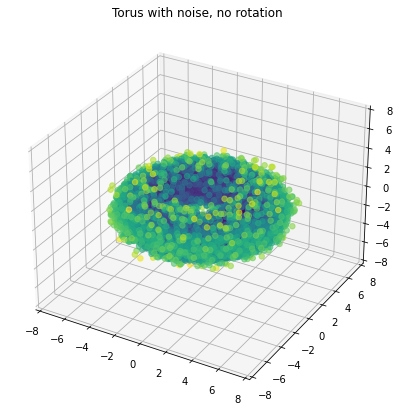

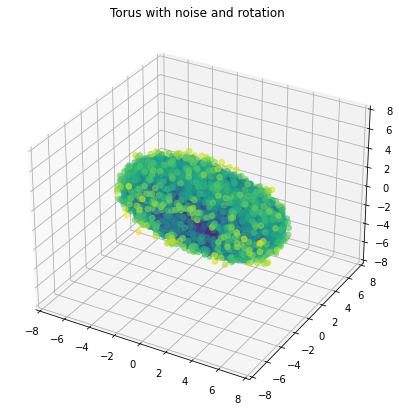

In [58]:
###5.Torus dimension 20
#stage1:
n = 90
theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
theta, phi = np.meshgrid(theta, phi)
c, a = 4, 1.5
x = (c + a*np.cos(theta)) * np.cos(phi)
y = (c + a*np.cos(theta)) * np.sin(phi)
z = a * np.sin(theta)

torus = [x,y,z]
torus =np.reshape(torus,(3,n**2))
torus = np.append(torus,[[0]*n**2]*17,0)##
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
xyz = np.vstack([torus[0,:],torus[1,:],torus[2,:]])
density = stats.gaussian_kde(xyz)(xyz) 
idx = density.argsort()
x, y, z, density = torus[0,:][idx], torus[1,:][idx], torus[2,:][idx], density[idx]
ax.scatter(x,y,z,c=-density, s=30, alpha=0.6)
ax.set_title("Torus no rotate, no noise")
ax.axes.set_xlim3d(left=-2*c, right=2*c) 
ax.axes.set_ylim3d(bottom=-2*c, top=2*c) 
ax.axes.set_zlim3d(bottom=-2*c, top=2*c)
plt.show()
#stage2 with rotate:
theta = np.radians(115)
rotation = np.identity(20)
rotation[2,2]=np.cos(theta)
rotation[1,2]=-np.sin(theta)
rotation[2,1]=np.sin(theta)
rotation[1,1]=np.cos(theta)

rotation1 = np.identity(20)
rotation1[0,0]=np.cos(theta)
rotation1[0,1]=-np.sin(theta)
rotation1[1,0]=np.sin(theta)
rotation1[1,1]=np.cos(theta)
rot_torus=rotation.dot(torus)##

fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
xyz = np.vstack([rot_torus[0,:],rot_torus[1,:],rot_torus[2,:]])
density = stats.gaussian_kde(xyz)(xyz) 
idx = density.argsort()
x, y, z, density = rot_torus[0,:][idx], rot_torus[1,:][idx], rot_torus[2,:][idx], density[idx]
ax.scatter(x,y,z,c=-density, s=30, alpha=0.6)
ax.set_title("Torus with rotation, no noise")
ax.axes.set_xlim3d(left=-2*c, right=2*c) 
ax.axes.set_ylim3d(bottom=-2*c, top=2*c) 
ax.axes.set_zlim3d(bottom=-2*c, top=2*c)
plt.show()
#stage3 add noise:
sigma=0.4
noise = np.random.normal(0,sigma,3*n**2).reshape((3,n**2))
noise = np.append(noise,[[0]*n**2]*17,0)

torus_noise=torus+noise###
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
xyz = np.vstack([torus_noise[0,:],torus_noise[1,:],torus_noise[2,:]])
density = stats.gaussian_kde(xyz)(xyz) 
idx = density.argsort()
x, y, z, density = torus_noise[0,:][idx], torus_noise[1,:][idx], torus_noise[2,:][idx], density[idx]
ax.scatter(x,y,z,c=-density, s=30, alpha=0.6)
ax.set_title("Torus with noise, no rotation")
ax.axes.set_xlim3d(left=-2*c, right=2*c) 
ax.axes.set_ylim3d(bottom=-2*c, top=2*c) 
ax.axes.set_zlim3d(bottom=-2*c, top=2*c)
plt.show()
#rotate with noise
noise = np.random.normal(0,sigma,3*n**2).reshape((3,n**2))
noise = np.append(noise,[[0]*n**2]*17,0)
rot_noise_torus = rot_torus+noise###

fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
xyz = np.vstack([rot_noise_torus[0,:],rot_noise_torus[1,:],rot_noise_torus[2,:]])
density = stats.gaussian_kde(xyz)(xyz) 
idx = density.argsort()
x, y, z, density = rot_noise_torus[0,:][idx], rot_noise_torus[1,:][idx], rot_noise_torus[2,:][idx], density[idx]
ax.scatter(x,y,z,c=-density, s=30, alpha=0.6)
ax.set_title("Torus with noise and rotation")
ax.axes.set_xlim3d(left=-2*c, right=2*c) 
ax.axes.set_ylim3d(bottom=-2*c, top=2*c) 
ax.axes.set_zlim3d(bottom=-2*c, top=2*c)
plt.show()
##Four datasets(20*n**2 matrix) used for manifold learning:
#1.torus
#2.rot_torus
#3.torus_noise
#4.rot_noise_torus
np.savetxt('torus.csv',torus, delimiter=',')
np.savetxt('torus_rot.csv', rot_torus, delimiter=',')
np.savetxt('torus_noise.csv', torus_noise, delimiter=',')
np.savetxt('torus_noise_rot.csv', rot_noise_torus, delimiter=',')

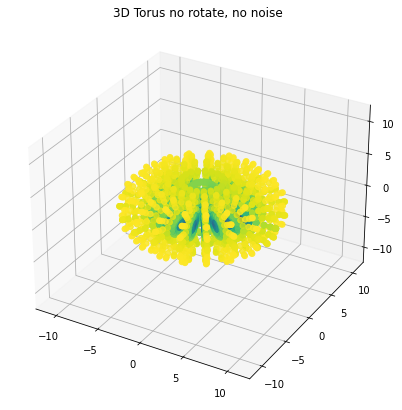

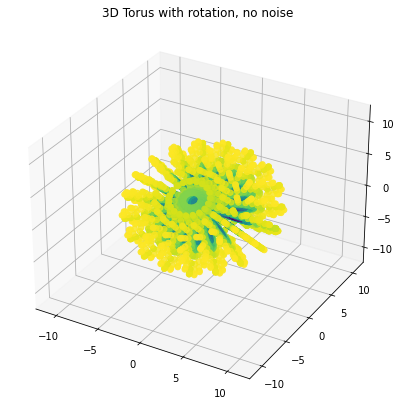

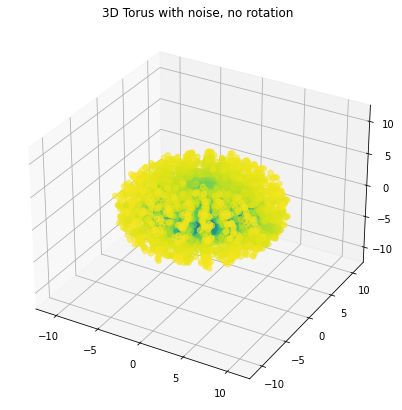

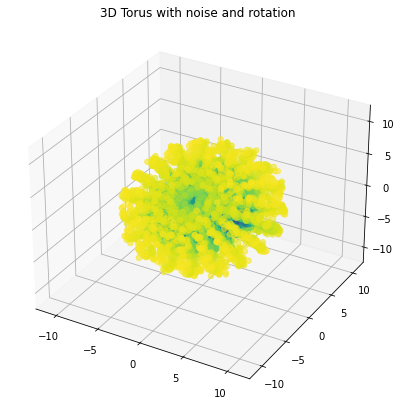

In [80]:
###6.Three-Torus dimension 20
#stage1:
n = 20
theta = np.linspace(0, 2.*np.pi, n)
phi = np.linspace(0, 2.*np.pi, n)
gamma = np.linspace(0, 2.*np.pi, n)
theta, phi, gamma = np.meshgrid(theta, phi,gamma)

r, t, d = 4, 1.5, 3
x = (r+(t+d*np.cos(theta))*np.cos(phi))*np.cos(gamma)
y = (r+(t+d*np.cos(theta))*np.cos(phi))*np.sin(gamma)
z = (t+d*np.cos(theta))*np.sin(phi)
w = d*np.sin(theta)


torus = [x,y,z,w]
torus =np.reshape(torus,(4,n**3))
threeD_torus = np.append(torus,[[0]*n**3]*16,0)##

fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
xyz = np.vstack([threeD_torus[0,:],threeD_torus[1,:],threeD_torus[2,:]])
density = stats.gaussian_kde(xyz)(xyz) 
idx = density.argsort()
x, y, z, density = threeD_torus[0,:][idx], threeD_torus[1,:][idx], threeD_torus[2,:][idx], density[idx]
ax.scatter(x,y,z,c=-density, s=30, alpha=0.6)
ax.set_title("3D Torus no rotate, no noise")
ax.axes.set_xlim3d(left=-3*c, right=3*c) 
ax.axes.set_ylim3d(bottom=-3*c, top=3*c) 
ax.axes.set_zlim3d(bottom=-3*c, top=3*c)
plt.show()

#stage2 with rotate:
theta = np.radians(40)
rotation = np.identity(20)
rotation[2,2]=np.cos(theta)
rotation[1,2]=-np.sin(theta)
rotation[2,1]=np.sin(theta)
rotation[1,1]=np.cos(theta)

rotation1 = np.identity(20)
rotation1[0,0]=np.cos(theta)
rotation1[0,1]=-np.sin(theta)
rotation1[1,0]=np.sin(theta)
rotation1[1,1]=np.cos(theta)

rot_threeD_torus=rotation.dot(threeD_torus)##


fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
xyz = np.vstack([rot_threeD_torus[0,:],rot_threeD_torus[1,:],rot_threeD_torus[2,:]])
density = stats.gaussian_kde(xyz)(xyz) 
idx = density.argsort()
x, y, z, density = rot_threeD_torus[0,:][idx], rot_threeD_torus[1,:][idx], rot_threeD_torus[2,:][idx], density[idx]
ax.scatter(x,y,z,c=-density, s=30, alpha=0.6)
ax.set_title("3D Torus with rotation, no noise")
ax.axes.set_xlim3d(left=-3*c, right=3*c) 
ax.axes.set_ylim3d(bottom=-3*c, top=3*c) 
ax.axes.set_zlim3d(bottom=-3*c, top=3*c)
plt.show()
#stage3 add noise:
sigma=0.25
noise = np.random.normal(0,sigma,4*n**3).reshape((4,n**3))
noise = np.append(noise,[[0]*n**3]*16,0)
threeD_torus_noise=threeD_torus+noise###

fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
xyz = np.vstack([threeD_torus_noise[0,:],threeD_torus_noise[1,:],threeD_torus_noise[2,:]])
density = stats.gaussian_kde(xyz)(xyz) 
idx = density.argsort()
x, y, z, density = threeD_torus_noise[0,:][idx],threeD_torus_noise[1,:][idx],threeD_torus_noise[2,:][idx],density[idx]
ax.scatter(x,y,z,c=-density, s=30, alpha=0.6)
ax.set_title("3D Torus with noise, no rotation")
ax.axes.set_xlim3d(left=-3*c, right=3*c) 
ax.axes.set_ylim3d(bottom=-3*c, top=3*c) 
ax.axes.set_zlim3d(bottom=-3*c, top=3*c)
plt.show()

#rotate with noise
noise = np.random.normal(0,sigma,4*n**3).reshape((4,n**3))
noise = np.append(noise,[[0]*n**3]*16,0)
rot_noise_threeD_torus = rot_threeD_torus+noise###

fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection="3d")
xyz = np.vstack([rot_noise_threeD_torus[0,:],rot_noise_threeD_torus[1,:],rot_noise_threeD_torus[2,:]])
density = stats.gaussian_kde(xyz)(xyz) 
idx = density.argsort()
x, y, z, density = rot_noise_threeD_torus[0,:][idx], rot_noise_threeD_torus[1,:][idx], rot_noise_threeD_torus[2,:][idx], density[idx]
ax.scatter(x,y,z,c=-density, s=30, alpha=0.6)
ax.set_title("3D Torus with noise and rotation")
ax.axes.set_xlim3d(left=-3*c, right=3*c) 
ax.axes.set_ylim3d(bottom=-3*c, top=3*c) 
ax.axes.set_zlim3d(bottom=-3*c, top=3*c)
plt.show()
##Four datasets(20*n**2 matrix) used for manifold learning:
#1.threeD_torus
#2.rot_threeD_torus
#3.threeD_torus_noise
#4.rot_noise_threeD_torus
np.savetxt('threeD_torus.csv',threeD_torus, delimiter=',')
np.savetxt('rot_threeD_torus.csv', rot_threeD_torus, delimiter=',')
np.savetxt('threeD_torus_noise.csv', threeD_torus_noise, delimiter=',')
np.savetxt('rot_noise_threeD_torus.csv', rot_noise_threeD_torus, delimiter=',')